#1. 프로젝트 개요
본 프로젝트의 목적은 고객의 인구통계학적 정보와 금융 데이터를 분석하여 대출 채무 불이행(Loan Status) 여부를 예측하는 머신러닝 모델을 개발하는 것입니다. 학생들은 주어진 데이터를 전처리하고 시각화하여 통찰을 얻은 후, 분류 모델을 구축하고 그 성능을 평가해야 합니다.

# 2. 분석 데이터셋 정보
## 파일명: credit_risk_dataset.csv

## 주요 변수:

- person_age: 나이

- person_income: 연소득

- person_home_ownership: 주택 소유 형태 (RENT, MORTGAGE, OWN 등)

- person_emp_length: 근속 기간 (년)

- loan_intent: 대출 의도 (EDUCATION, MEDICAL, VENTURE 등)

- loan_grade: 대출 등급 (A ~ G)

- loan_amnt: 대출 금액

- loan_int_rate: 이자율

- loan_status: 대출 상태 (Target 변수 / 0: 정상, 1: 채무 불이행)

- loan_percent_income: 소득 대비 대출 비율

- cb_person_default_on_file: 과거 연체 기록 여부 (Y, N)

- cb_person_cred_hist_length: 신용 이력 기간

# 3. 단계별 요구사항 (Process)

## STEP 1: 데이터 로드 및 환경 설정
라이브러리: 데이터 핸들링을 위한 pandas, 수치 계산을 위한 numpy, 시각화를 위한 matplotlib, seaborn 및 모델링을 위한 sklearn 라이브러리를 활용합니다.

로드: 제공된 credit_risk_dataset.csv 파일을 불러옵니다.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/raw/credit_risk_dataset.csv')

## STEP 2: 데이터 전처리 (필수 구현 사항)
데이터의 신뢰성을 위해 다음 과정을 반드시 포함해야 합니다.

1. 이상치 제거: 비현실적인 데이터(예: 나이 90세 초과, 근속 연수 60년 초과)를 필터링하여 제거합니다.

2. 결측치 처리: person_emp_length와 loan_int_rate 변수의 결측치를 각 변수의 **중앙값(median)**으로 대체합니다.

3. 범주형 변수 인코딩: person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file 변수를 모델이 인식할 수 있도록 원-핫 인코딩(One-Hot Encoding) 처리합니다. 이때 다중공선성 방지를 위해 첫 번째 범주를 드롭(drop_first=True)합니다.

In [4]:
df = df[df['person_age'] < 90]
df = df[df['person_emp_length'] <= 60]

df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df_encode = pd.get_dummies(df, columns=cat_cols, drop_first=True)

display(df_encode)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,2,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,False,False,...,False,True,False,False,True,False,False,False,False,False
32577,54,120000,4.0,17625,7.49,0,0.15,19,False,False,...,False,True,False,False,False,False,False,False,False,False
32578,65,76000,3.0,35000,10.99,1,0.46,28,False,False,...,False,False,False,True,False,False,False,False,False,False
32579,56,150000,5.0,15000,11.48,0,0.10,26,False,False,...,False,True,False,True,False,False,False,False,False,False


## STEP 3: 데이터 탐색 및 시각화 (EDA)
데이터의 특성을 파악하기 위해 다음 지표들을 시각화합니다.

1. 타겟 변수인 loan_status의 비율을 확인합니다.

2. 대출 등급(loan_grade)과 주거 형태(person_home_ownership)에 따른 연체 현황을 분석합니다.

3. 연령대 분포와 소득 대비 대출 비율(loan_percent_income)이 연체에 미치는 영향을 박스 플롯이나 히스토그램으로 확인합니다.

4. 수치형 변수들 간의 상관관계를 히트맵(Heatmap)으로 파악합니다.

Text(0.5, 1.0, 'Correlarion Heatmap')

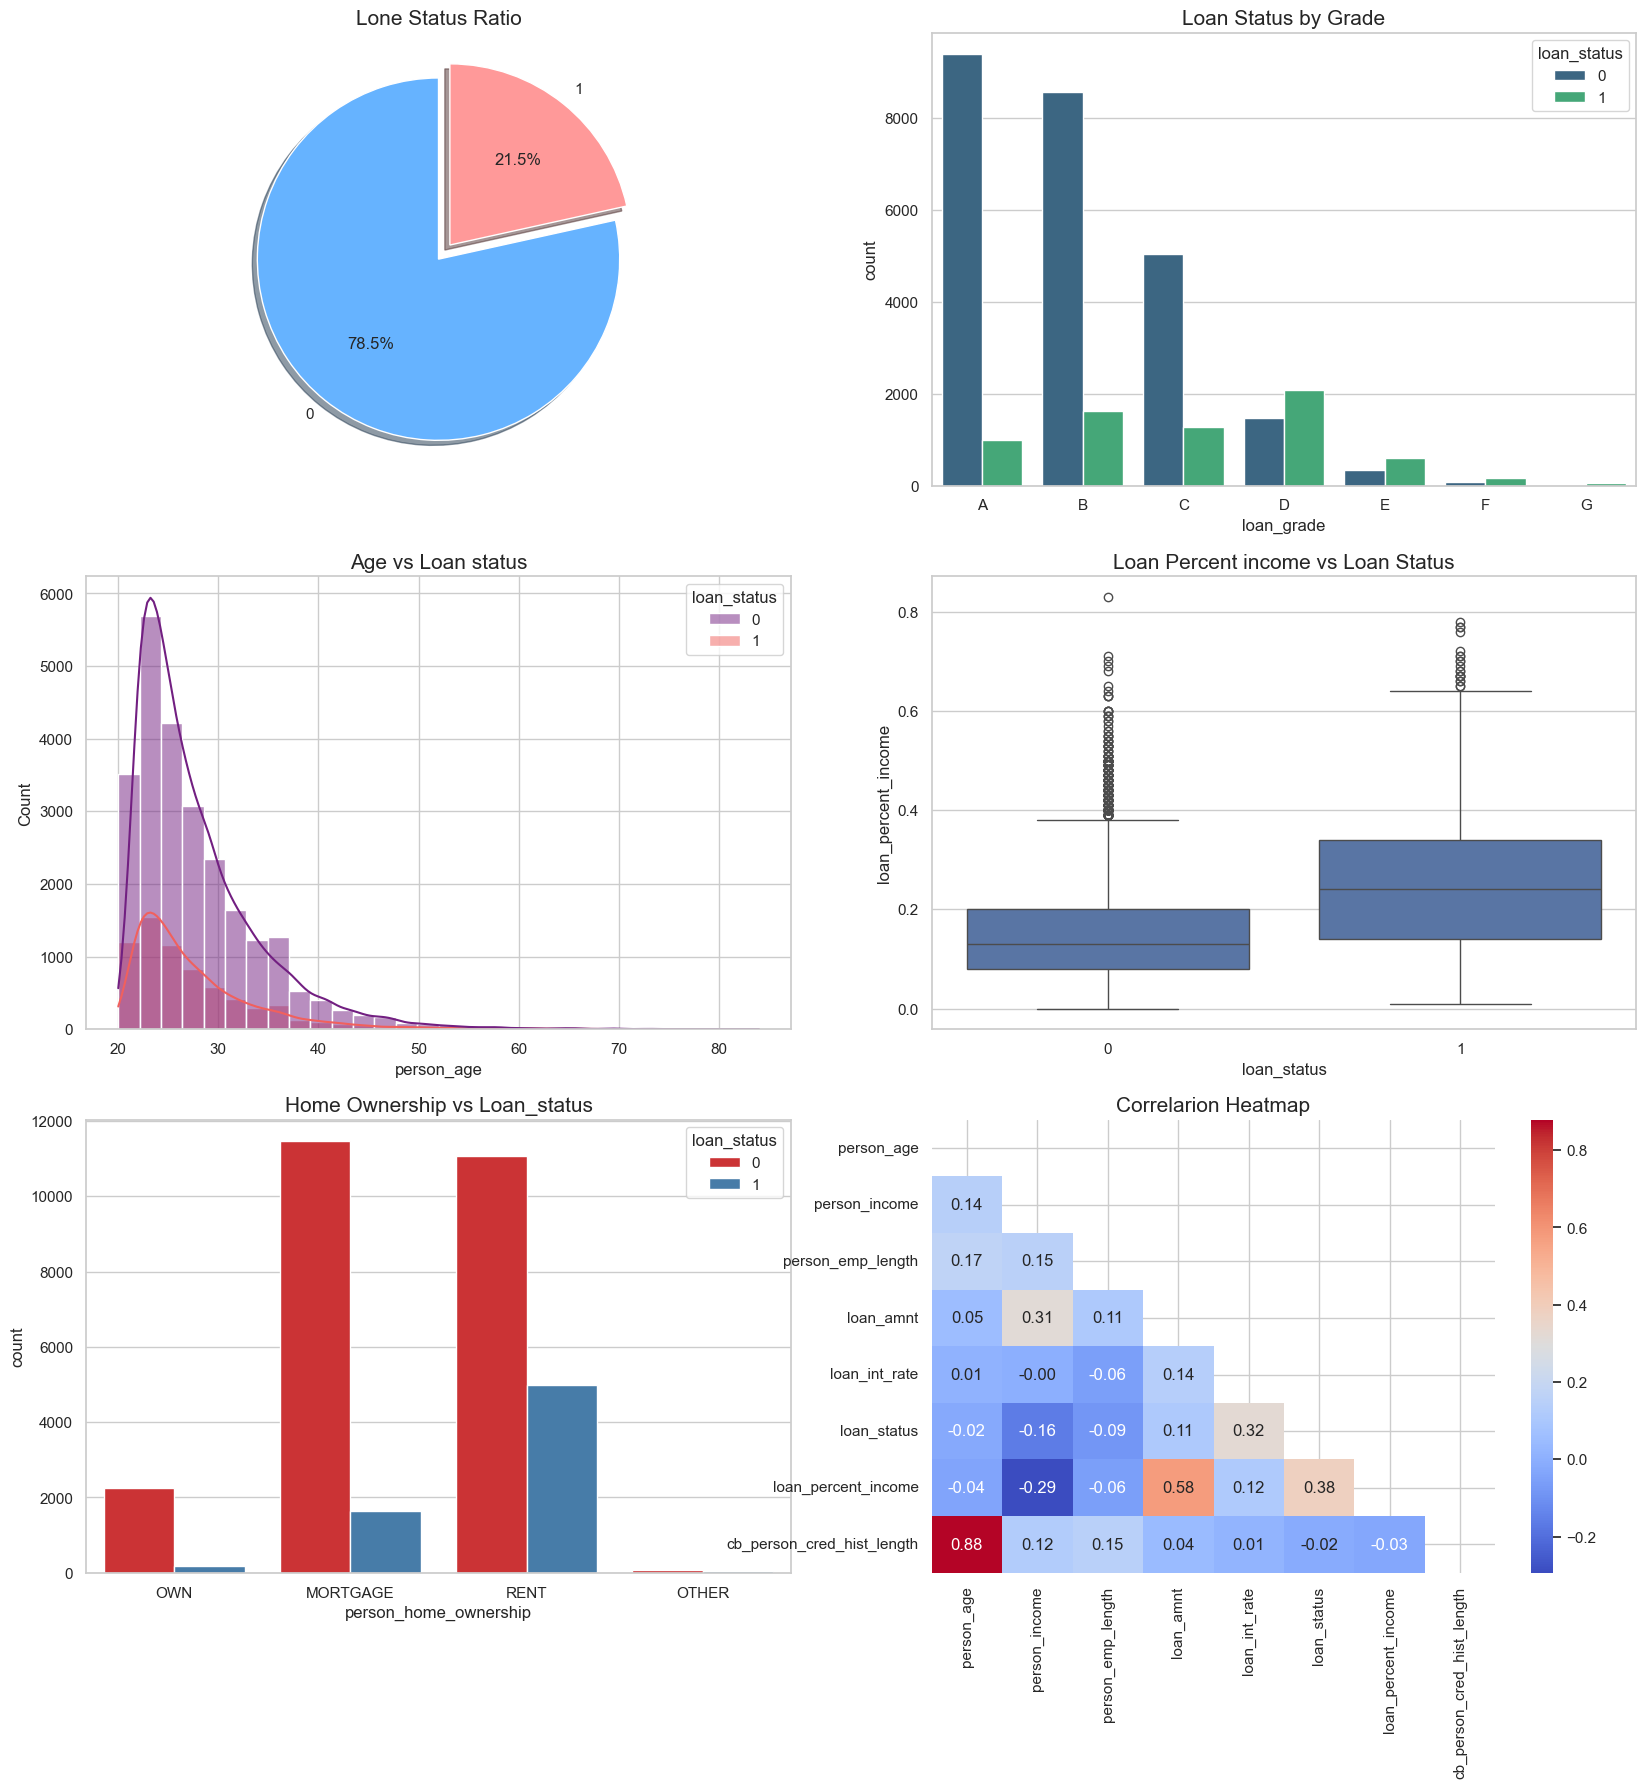

In [5]:
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (20, 15)
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

df['loan_status'].value_counts().plot.pie(
    explode=[0, 0.1], autopct = '%1.1f%%', ax=axes[0,0], shadow=True,
    colors=['#66b3ff', '#ff9999'], startangle = 90
)
axes[0, 0].set_title('Lone Status Ratio', fontsize=15)
axes[0, 0].set_ylabel('')

sns.countplot(x='loan_grade', hue='loan_status', data=df, ax=axes[0, 1],
              palette='viridis', order=sorted(df['loan_grade'].unique()))
axes[0, 1].set_title('Loan Status by Grade', fontsize=15)

sns.countplot(x='person_home_ownership', hue='loan_status', data=df, ax=axes[2, 0], palette='Set1')
axes[2, 0].set_title('Home Ownership vs Loan_status', fontsize=15)

sns.histplot(data=df, x='person_age', hue='loan_status', bins=30, kde=True, ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Age vs Loan status', fontsize=15)

sns.boxplot(x='loan_status', y='loan_percent_income', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Loan Percent income vs Loan Status', fontsize=15)

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[2, 1])
axes[2, 1].set_title('Correlarion Heatmap', fontsize=15)

## STEP 4: 모델 구축 및 학습
1. 데이터 분리: 학습 데이터와 테스트 데이터를 적절한 비율(예: 8:2)로 분리합니다.

2. 알고리즘: sklearn.ensemble 라이브러리의 랜덤 포레스트 분류기(RandomForestClassifier) 모델을 기본 모델로 사용합니다.

3. 모델 학습: 전처리된 학습 데이터를 기반으로 모델을 학습시킵니다.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X = df_encode.drop('loan_status', axis=1)
y = df_encode['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
num_cols = ['person_income', 'person_emp_length', 
            'loan_amnt', 'cb_person_cred_hist_length', 'loan_percent_income']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## STEP 5: 모델 평가
- 학습된 모델을 사용하여 테스트 데이터의 예측값을 생성합니다.

- 평가 지표: 분류 리포트(classification_report), 혼동 행렬(confusion_matrix)를 산출하여 모델의 예측 성능을 정량적으로 평가합니다.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1️⃣ 모델 생성
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# 2️⃣ 모델 학습
rf_model.fit(X_train, y_train)

# 3️⃣ 예측
y_pred = rf_model.predict(X_test)

# 4️⃣ 평가
print("Classification Report")
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4971
           1       0.96      0.73      0.83      1365

    accuracy                           0.94      6336
   macro avg       0.95      0.86      0.90      6336
weighted avg       0.94      0.94      0.93      6336

Confusion Matrix
[[4932   39]
 [ 362 1003]]


## STEP 6: 다중공선성 해결
- 다중공선성이 의심되는 변수를 제거하여 모델의 예측 성능을 다시 평가합니다.
- 평가 지표는 분류 리포트(classification_report), 혼동 행렬(confusion_matrix)를 사용하시면 됩니다

In [8]:
df_reduced = df_encode.drop('person_age', axis=1)

X_reduce = df_reduced.drop('loan_status', axis=1)
y_reduce = df_reduced['loan_status']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_reduce, y_reduce, test_size=0.2, random_state=42, stratify = y_reduce
)

scaler = StandardScaler()
num_cols = ['person_income', 'person_emp_length', 
            'loan_amnt', 'cb_person_cred_hist_length', 'loan_percent_income']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

rf_model_red = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model_red.fit(X_train_red, y_train_red)

# 4️⃣ 평가
print(classification_report(y_test_red, rf_model_red.predict(X_test_red)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4971
           1       0.96      0.73      0.83      1365

    accuracy                           0.93      6336
   macro avg       0.94      0.86      0.89      6336
weighted avg       0.94      0.93      0.93      6336



## STEP 7: 중요 변수확인 및 시각화
- 모델 예측에 있어서 중요 변수를 파악하고 인사이트를 도출하도록 합니다.

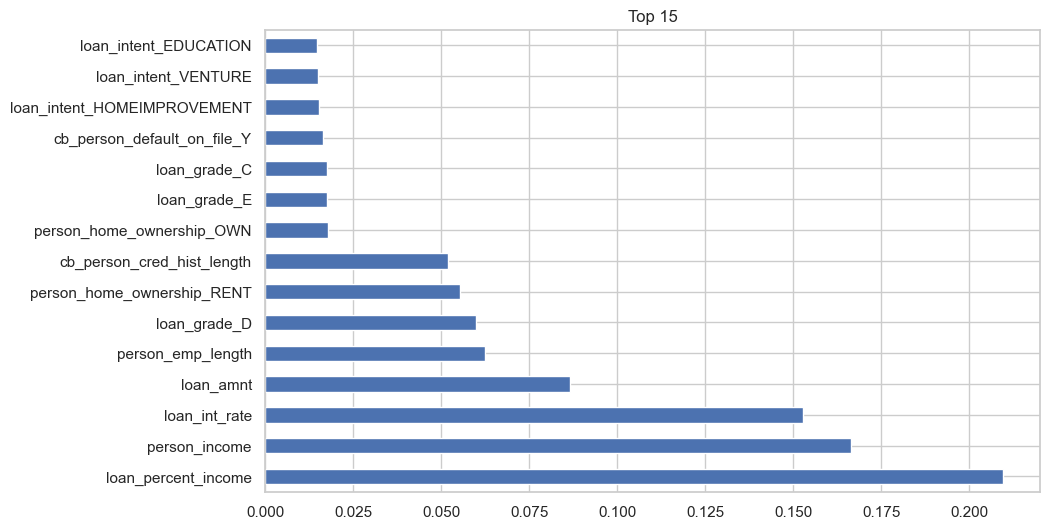

In [9]:
importances = pd.Series(rf_model_red.feature_importances_, index=X_reduce.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.head(15).plot(kind='barh')
plt.title("Top 15")
plt.show()